# Level 1

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [86]:
df=pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Task1
- **Data Exploration and Preprocessing**

- **Explore the dataset and identify the number of rows and columns.**

In [87]:
rows,columns=df.shape
print("Nunber of rows",rows)
print("Number of columns",columns)

Nunber of rows 9551
Number of columns 21


- **Check for missing values in each column and handle them accordingly.**

In [88]:
missing_values=df.isnull().sum()
print("Missing values in each columns are :-")
print(missing_values)
for column in df.columns:
    if df[column].isnull().sum()>0:
        if df[column].dtype in ['float64', 'int64']:
             df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

Missing values in each columns are :-
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


- **Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.**

In [89]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [90]:
df = df.convert_dtypes()
print(df.dtypes)

Restaurant ID                    Int64
Restaurant Name         string[python]
Country Code                     Int64
City                    string[python]
Address                 string[python]
Locality                string[python]
Locality Verbose        string[python]
Longitude                      Float64
Latitude                       Float64
Cuisines                string[python]
Average Cost for two             Int64
Currency                string[python]
Has Table booking       string[python]
Has Online delivery     string[python]
Is delivering now       string[python]
Switch to order menu    string[python]
Price range                      Int64
Aggregate rating               Float64
Rating color            string[python]
Rating text             string[python]
Votes                            Int64
dtype: object


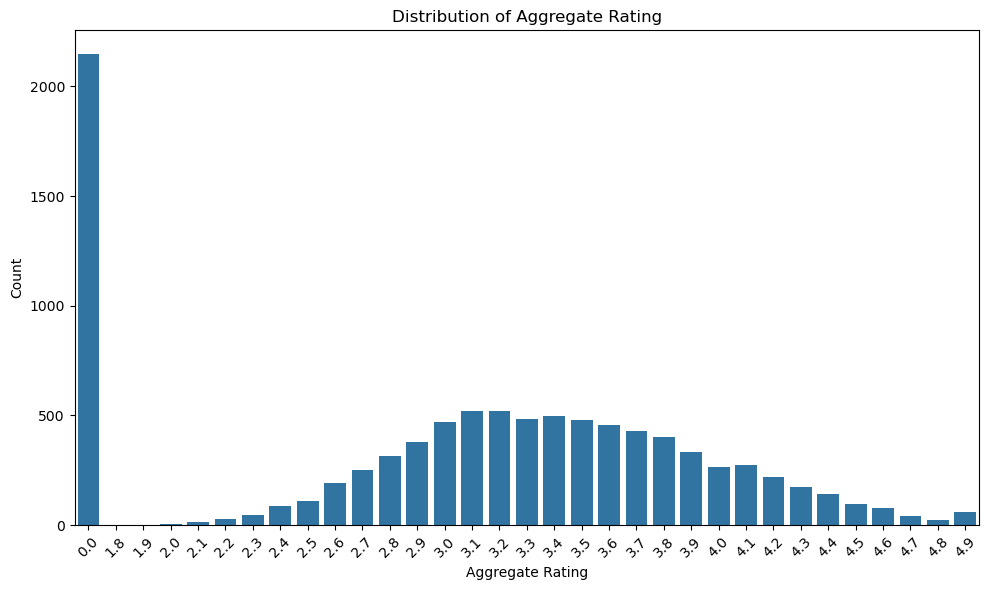

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Aggregate rating', data=df)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
rating_counts = df['Aggregate rating'].value_counts(normalize=True)
print("Class distribution (percentage):\n", rating_counts * 100)

Class distribution (percentage):
 Aggregate rating
0.0    22.489792
3.2     5.465396
3.1     5.433986
3.4     5.214114
3.3     5.057062
3.5     5.025652
3.0      4.90001
3.6     4.795309
3.7     4.470736
3.8     4.188043
2.9     3.989111
3.9     3.507486
2.8     3.298084
4.1      2.86881
4.0     2.785049
2.7     2.617527
4.2     2.313894
2.6     1.999791
4.3     1.821799
4.4     1.507696
2.5     1.151712
4.5      0.99466
2.4     0.910899
4.6     0.816668
4.9     0.638677
2.3     0.492095
4.7     0.439745
2.2     0.282693
4.8     0.261753
2.1     0.157052
2.0     0.073291
1.9      0.02094
1.8      0.01047
Name: proportion, dtype: Float64


# Task2
- **Task: Descriptive Analysis**

- **Calculate basic statistical measures (mean,median, standard deviation, etc.) for numerical columns.**

In [93]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.0,9551.0,9551.0,9551.0,9551.0,9551.0,9551.0,9551.0
mean,9051128.349178,18.365616,64.126574,25.854381,1199.210763,1.804837,2.66637,156.909748
std,8791521.282104,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,53.0,1.0,-157.948486,-41.330428,0.0,1.0,0.0,0.0
25%,301962.5,1.0,77.081343,28.478713,250.0,1.0,2.5,5.0
50%,6004089.0,1.0,77.191964,28.570469,400.0,2.0,3.2,31.0
75%,18352291.5,1.0,77.282006,28.642758,700.0,2.0,3.7,131.0
max,18500652.0,216.0,174.832089,55.97698,800000.0,4.0,4.9,10934.0


In [94]:
# Calculate basic statistical measures for numerical columns
numerical_stats = df.describe().T[['mean', '50%', 'std']]
numerical_stats.rename(columns={'50%': 'median'}, inplace=True)
print(numerical_stats)


                                mean     median             std
Restaurant ID         9051128.349178  6004089.0  8791521.282104
Country Code               18.365616        1.0       56.750546
Longitude                  64.126574  77.191964       41.467058
Latitude                   25.854381  28.570469       11.007935
Average Cost for two     1199.210763      400.0    16121.183073
Price range                 1.804837        2.0        0.905609
Aggregate rating             2.66637        3.2        1.516378
Votes                     156.909748       31.0      430.169145


- **Explore the distribution of categorical variables like "Country Code","City" and "Cuisines."**

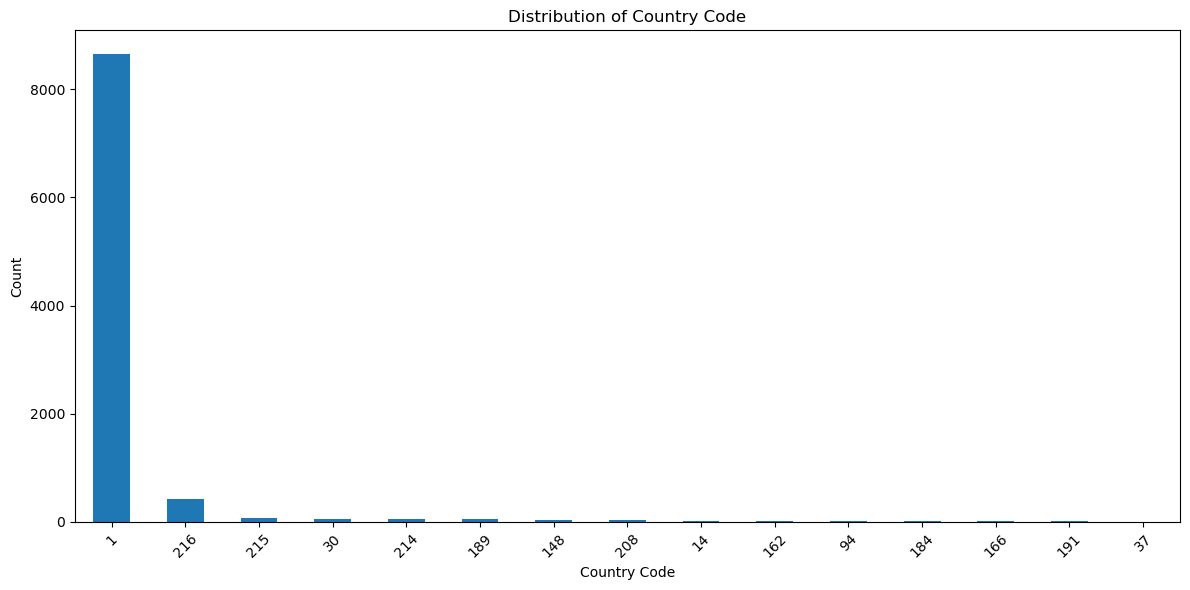

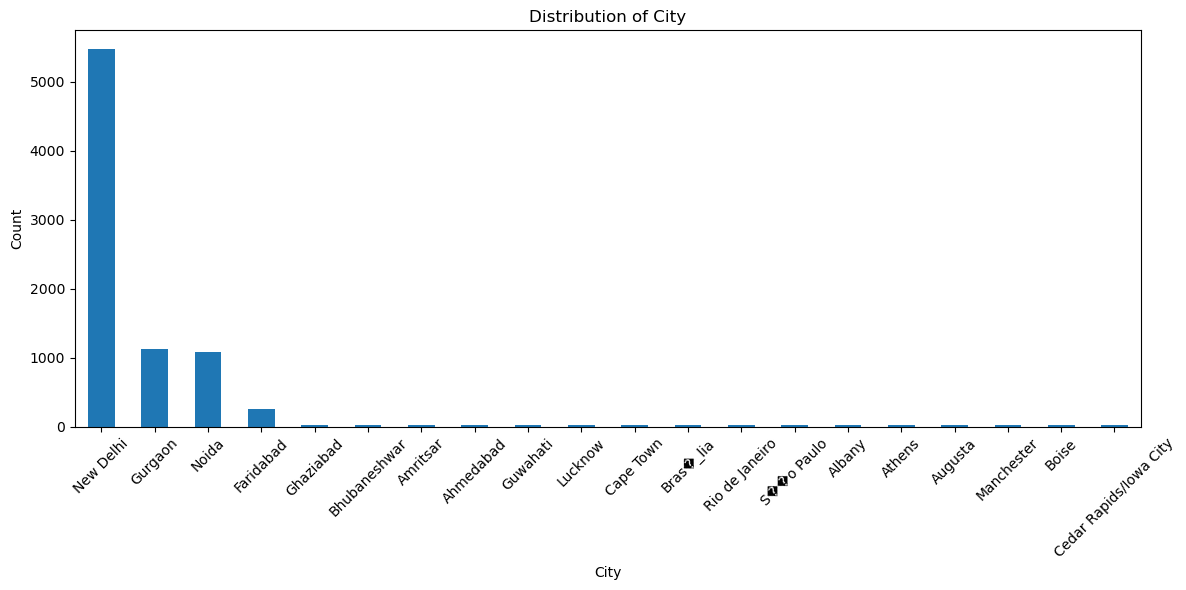

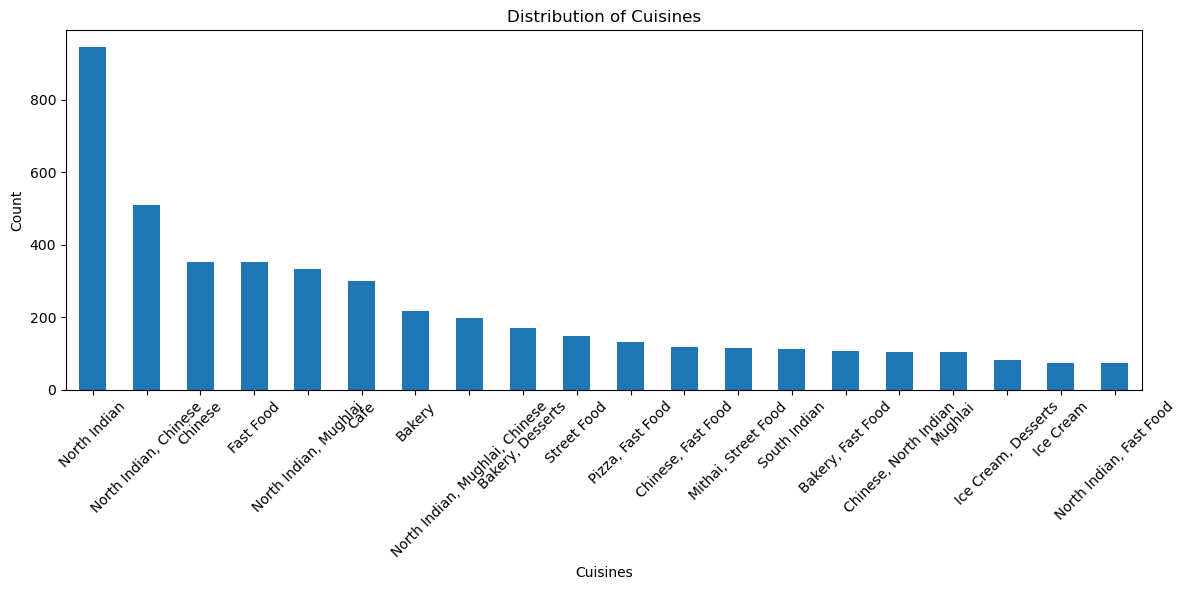

In [95]:
# Plot distribution of categorical variables
categorical_columns = ['Country Code', 'City', 'Cuisines']
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- **Identify the top cuisines and cities with the highest number of restaurants.**

In [96]:
# Top cuisines with the highest number of restaurants
top_cuisines = df['Cuisines'].value_counts().head(10)
print("Top 10 Cuisines:\n", top_cuisines)

# Top cities with the highest number of restaurants
top_cities = df['City'].value_counts().head(10)
print("\nTop 10 Cities:\n", top_cities)

Top 10 Cuisines:
 Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: Int64

Top 10 Cities:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Guwahati          21
Lucknow           21
Name: count, dtype: Int64


# Task3
- **Task: Geospatial Analysis**

- **Visualize the locations of restaurants on a map using latitude and longitude information.**

In [97]:
import folium

# Drop rows with missing coordinates
df_map = df.dropna(subset=['Latitude', 'Longitude'])

# Create a base map centered around the mean location
map_center = [df_map['Latitude'].mean(), df_map['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=2)

# Add restaurant locations to the map
for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.5
    ).add_to(restaurant_map)

# Save map to HTML file
restaurant_map.save('restaurant_locations_map.html')

- **Analyze the distribution of restaurants across different cities or countries.**

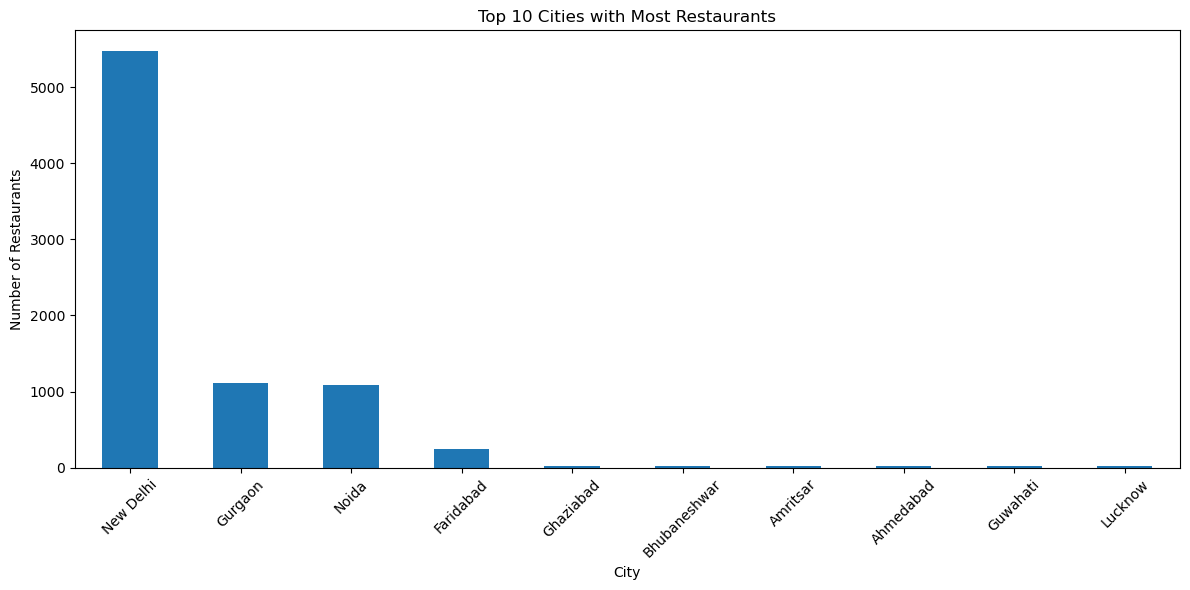

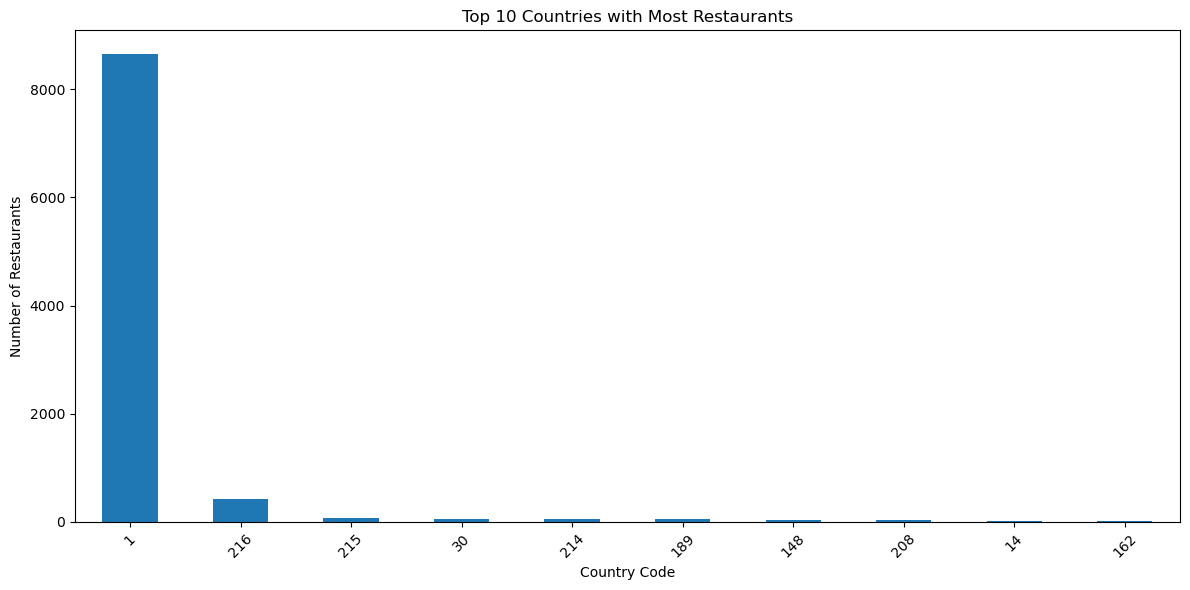

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of restaurants by city
plt.figure(figsize=(12, 6))
df['City'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of restaurants by country
plt.figure(figsize=(12, 6))
df['Country Code'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries with Most Restaurants')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Determine if there is any correlation between the restaurant's location and its rating.**

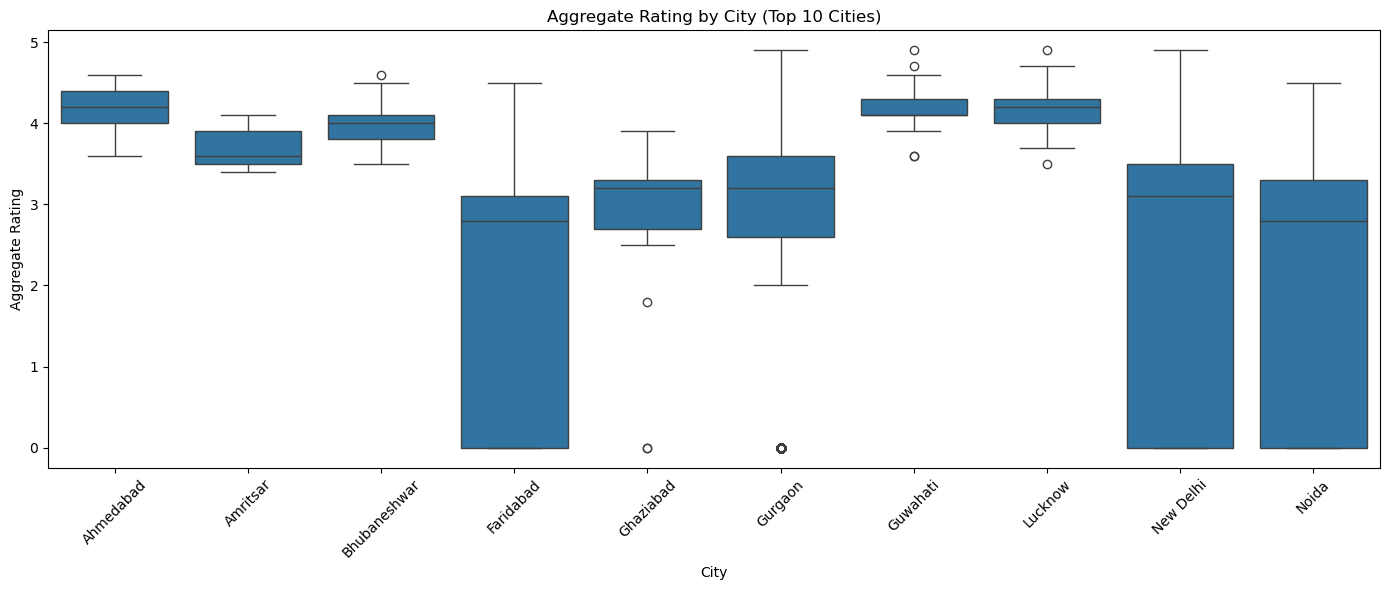

In [99]:
# Correlation between restaurant's location (City) and its rating
plt.figure(figsize=(14, 6))
sns.boxplot(x='City', y='Aggregate rating', data=df[df['City'].isin(df['City'].value_counts().head(10).index)])
plt.title('Aggregate Rating by City (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Level 2

### Task 1
- **Task: Table Booking and Online Delivery**

- **Determine the percentage of restaurants that offer table booking and online delivery.**

In [100]:

# Standardize the values in relevant columns
df['Has Table booking'] = df['Has Table booking'].str.lower().str.strip()
df['Has Online delivery'] = df['Has Online delivery'].str.lower().str.strip()

# Total number of restaurants
total_restaurants = len(df)

# Restaurants that offer both table booking and online delivery
both_services = df[
    (df['Has Table booking'] == 'yes') &
    (df['Has Online delivery'] == 'yes')
]

# Calculate the percentage
percentage = (len(both_services) / total_restaurants) * 100

print(f"Percentage of restaurants offering both table booking and online delivery: {percentage:.2f}%")

Percentage of restaurants offering both table booking and online delivery: 4.55%


- **Compare the average ratings of restaurants with table booking and those without.**

In [101]:

# Standardize the relevant column
df['Has Table booking'] = df['Has Table booking'].str.lower().str.strip()

# Convert rating column to numeric (if not already)
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Separate restaurants with and without table booking
with_booking = df[df['Has Table booking'] == 'yes']
without_booking = df[df['Has Table booking'] == 'no']

# Calculate average ratings
avg_with_booking = with_booking['Aggregate rating'].mean()
avg_without_booking = without_booking['Aggregate rating'].mean()

# Print results
print(f"Average rating (with table booking): {avg_with_booking:.2f}")
print(f"Average rating (without table booking): {avg_without_booking:.2f}")


Average rating (with table booking): 3.44
Average rating (without table booking): 2.56


- **Analyze the availability of online delivery among restaurants with different price ranges.**

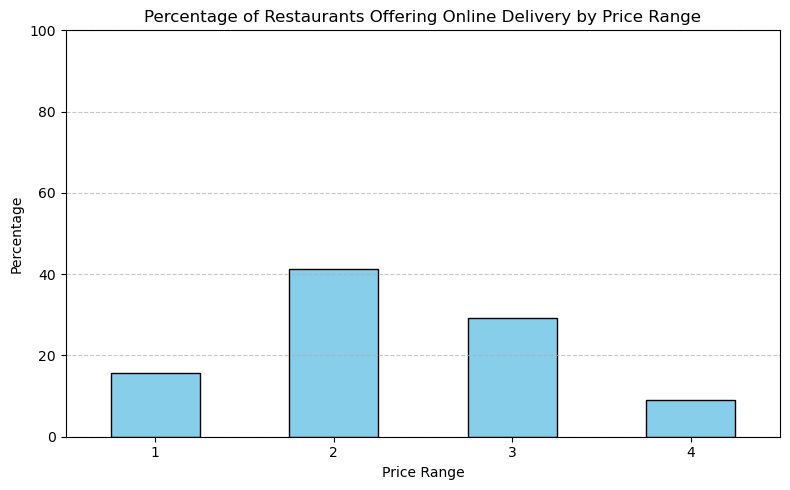

In [102]:
df['Has Online delivery'] = df['Has Online delivery'].str.lower().str.strip()

# Convert 'Price range' to numeric (if not already)
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')

# Group by price range and count how many offer online delivery
delivery_counts = df.groupby('Price range')['Has Online delivery'].value_counts().unstack().fillna(0)

# Calculate percentage of restaurants offering online delivery
delivery_percentage = (delivery_counts['yes'] / delivery_counts.sum(axis=1)) * 100

# Plotting
plt.figure(figsize=(8, 5))
delivery_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Restaurants Offering Online Delivery by Price Range')
plt.ylabel('Percentage')
plt.xlabel('Price Range')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task2
- **Task: Price Range Analysis**

- **Determine the most common price range among all the restaurants.**

In [103]:
most_common_price_range = df['Price range'].value_counts().idxmax()
count = df['Price range'].value_counts().max()

print(f"The most common price range is: {most_common_price_range} (appears {count} times)")

The most common price range is: 1 (appears 4444 times)


- **Calculate the average rating for each price range.**
- **Identify the color that represents the highest average rating among different price ranges.**

In [104]:

# Ensure proper formatting
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Group by Price range and calculate average rating
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

# Identify the price range with the highest average rating
max_avg_rating = avg_rating_by_price['Aggregate rating'].max()
highest_rating_row = avg_rating_by_price[avg_rating_by_price['Aggregate rating'] == max_avg_rating]

# Get the most common rating color for that price range
price_range_with_max_rating = highest_rating_row['Price range'].values[0]
common_color = df[df['Price range'] == price_range_with_max_rating]['Rating color'].mode().values[0]

# Print results
print("Average Rating for Each Price Range:")
print(avg_rating_by_price)

print(f"\nThe highest average rating is {max_avg_rating:.2f} in price range {price_range_with_max_rating}")
print(f"The most common color representing this rating is: {common_color}")


Average Rating for Each Price Range:
   Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918

The highest average rating is 3.82 in price range 4
The most common color representing this rating is: Yellow


### Task3
- **Task: Feature Engineering**

- **Extract additional features from the existing columns, such as the length of the restaurant name or address.**

In [105]:
# Assuming df is your DataFrame
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

# Display the DataFrame with new columns
print(df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']])

               Restaurant Name  Restaurant Name Length  \
0             Le Petit Souffle                      16   
1             Izakaya Kikufuji                      16   
2       Heat - Edsa Shangri-La                      22   
3                         Ooma                       4   
4                  Sambo Kojin                      11   
...                        ...                     ...   
9546               Naml۱ Gurme                      11   
9547              Ceviz A��ac۱                      12   
9548                     Huqqa                       5   
9549               A���k Kahve                      11   
9550  Walter's Coffee Roastery                      24   

                                                Address  Address Length  
0     Third Floor, Century City Mall, Kalayaan Avenu...              71  
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3     T

- **Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.**

In [106]:
df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the DataFrame with the new columns
print(df[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']])

     Has Table booking  Has Table Booking Has Online delivery  \
0                  yes                  0                  no   
1                  yes                  0                  no   
2                  yes                  0                  no   
3                   no                  0                  no   
4                  yes                  0                  no   
...                ...                ...                 ...   
9546                no                  0                  no   
9547                no                  0                  no   
9548                no                  0                  no   
9549                no                  0                  no   
9550                no                  0                  no   

      Has Online Delivery  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
9546                   

# Level 3

### Task 1
- **Task: Predictive Modeling**

- **Build a regression model to predict the aggregate rating of a restaurant based on available features.**
- **Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.**

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame

# Handle missing values by filling with the median (for numerical features)
imputer = SimpleImputer(strategy='median')
df[['Average Cost for two', 'Votes']] = imputer.fit_transform(df[['Average Cost for two', 'Votes']])

# Encode categorical columns (e.g., 'Has Table booking', 'Has Online delivery') as binary features
df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop non-numeric columns or irrelevant columns
df = df.drop(columns=['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose'])

# Convert 'Currency' column to numerical form (if necessary)
df['Currency'] = df['Currency'].apply(lambda x: 1 if x == 'INR' else 0)  # Example of encoding if the currency is 'INR'

# Target column: 'Aggregate rating'
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']


In [108]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:
# Check the columns of the encoded DataFrame
print(df_encoded.columns)

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Votes', 'Restaurant Name Length',
       'Address Length', 'Has Table Booking',
       ...
       'Rating color_Green', 'Rating color_Orange', 'Rating color_Red',
       'Rating color_White', 'Rating color_Yellow', 'Rating text_Excellent',
       'Rating text_Good', 'Rating text_Not rated', 'Rating text_Poor',
       'Rating text_Very Good'],
      dtype='object', length=1988)


In [110]:
# Adjust this list to match the available columns
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Currency']

# Drop only the columns that exist in the DataFrame
df_encoded = df_encoded.drop(columns=[col for col in columns_to_drop if col in df_encoded.columns])

# Verify the columns after dropping
print(df_encoded.columns)


Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Votes', 'Restaurant Name Length',
       'Address Length', 'Has Table Booking',
       ...
       'Rating color_Green', 'Rating color_Orange', 'Rating color_Red',
       'Rating color_White', 'Rating color_Yellow', 'Rating text_Excellent',
       'Rating text_Good', 'Rating text_Not rated', 'Rating text_Poor',
       'Rating text_Very Good'],
      dtype='object', length=1988)


In [111]:
# Target column: 'Aggregate rating'
X = df_encoded.drop(columns=['Aggregate rating'])
y = df_encoded['Aggregate rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.029953911041339588
R² Score: 0.9868398608463531


In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['Aggregate rating'])
y = df_encoded['Aggregate rating']

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Train the models
linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred_lr = linear_reg_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Step 6: Evaluate the models using Mean Squared Error (MSE) and R² score
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)

# Step 7: Print the results for comparison
print("Model Comparison:")
print(f"Linear Regression - MSE: {mse_lr}, R²: {r2_lr}")
print(f"Decision Tree - MSE: {mse_dt}, R²: {r2_dt}")
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")


Model Comparison:
Linear Regression - MSE: 193517636906.46906, R²: -85021252377.67294
Decision Tree - MSE: 0.05693354264782835, R²: 0.9749864602748716
Random Forest - MSE: 0.029953911041339588, R²: 0.9868398608463531


### Conclusion:
- Best Performing Model: Random Forest Regressor seems to be the best choice, with the lowest MSE and highest R² score, indicating it has the best predictive power on this dataset.
- Second Best: Decision Tree performs very well but might be slightly prone to overfitting, so you might want to tune the hyperparameters to prevent this.
- Worst Model: Linear Regression is clearly underperforming and not suitable for this dataset, likely due to its linear assumptions not matching the data's underlying structure.

### Task 2
- **Task: Customer Preference Analysis**

- **Analyze the relationship between the type of cuisine and the restaurant's rating.**

In [113]:
# Create a new DataFrame where each cuisine appears individually
df_cuisine_rating = df[['Cuisines', 'Aggregate rating']].dropna()

# Split the multiple cuisines and explode them into separate rows
df_cuisine_rating['Cuisines'] = df_cuisine_rating['Cuisines'].str.split(', ')
df_cuisine_rating = df_cuisine_rating.explode('Cuisines')

In [114]:
cuisine_rating_summary = df_cuisine_rating.groupby('Cuisines')['Aggregate rating'].agg(['mean', 'count']).reset_index()
cuisine_rating_summary.columns = ['Cuisine', 'Average Rating', 'Number of Restaurants']

In [115]:
filtered_summary = cuisine_rating_summary[cuisine_rating_summary['Number of Restaurants'] > 20]

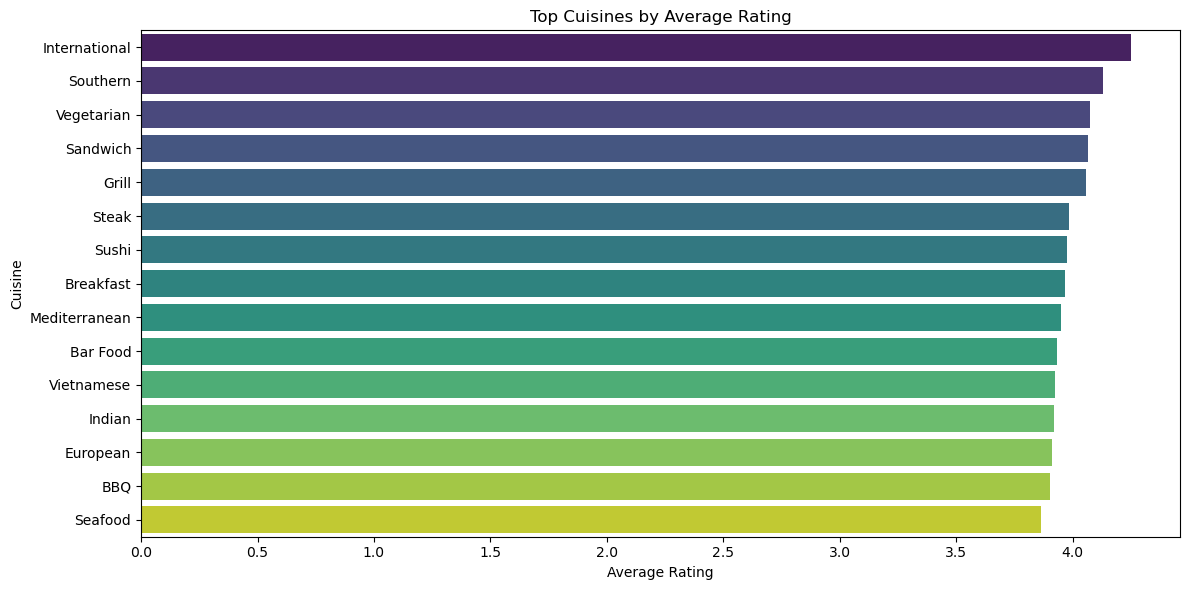

In [116]:

# Sort by rating
top_cuisines = filtered_summary.sort_values('Average Rating', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cuisines, x='Average Rating', y='Cuisine', palette='viridis')
plt.title('Top Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


- **Identify the most popular cuisines among customers based on the number of votes.**

In [117]:
# Select relevant columns and remove missing values
df_cuisine_votes = df[['Cuisines', 'Votes']].dropna()

# Split multiple cuisines and explode them into separate rows
df_cuisine_votes['Cuisines'] = df_cuisine_votes['Cuisines'].str.split(', ')
df_cuisine_votes = df_cuisine_votes.explode('Cuisines')


In [118]:
# Group by cuisine and calculate total votes
popular_cuisines = df_cuisine_votes.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort by votes in descending order
popular_cuisines = popular_cuisines.sort_values(by='Votes', ascending=False)


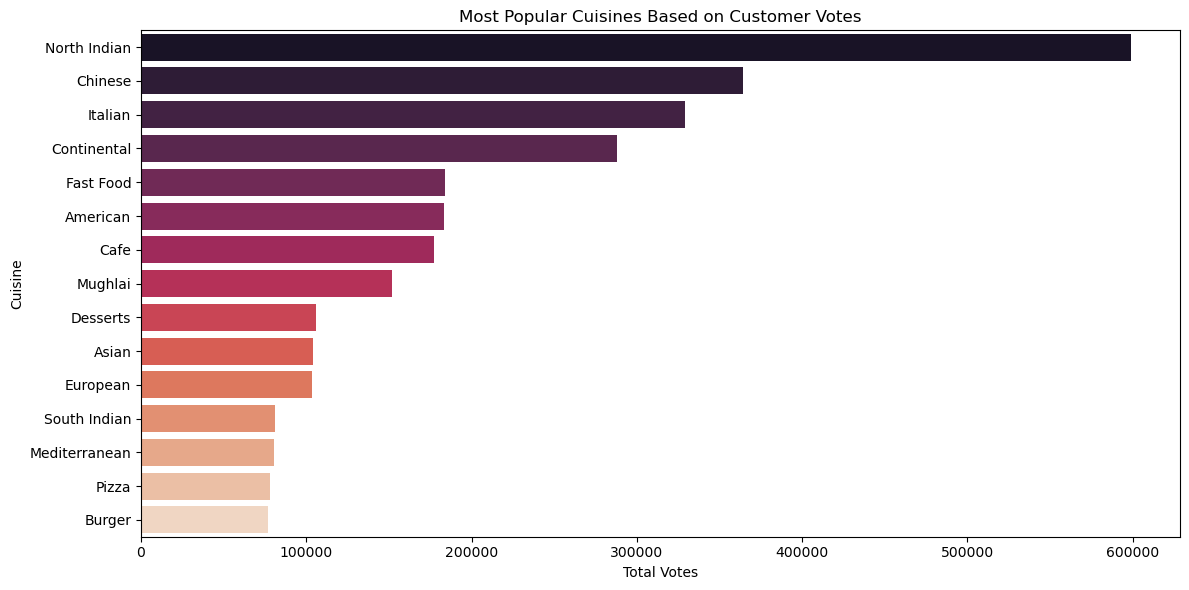

In [119]:

# Show top 15 popular cuisines
top_popular = popular_cuisines.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_popular, x='Votes', y='Cuisines', palette='rocket')
plt.title('Most Popular Cuisines Based on Customer Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


- **Determine if there are any specific cuisines that tend to receive higher ratings.**

In [120]:
# Select relevant columns and drop missing values
df_cuisine_rating = df[['Cuisines', 'Aggregate rating']].dropna()

# Split multiple cuisines and explode
df_cuisine_rating['Cuisines'] = df_cuisine_rating['Cuisines'].str.split(', ')
df_cuisine_rating = df_cuisine_rating.explode('Cuisines')


In [121]:
# Group by cuisine and calculate mean rating and count
cuisine_rating = df_cuisine_rating.groupby('Cuisines')['Aggregate rating'].agg(['mean', 'count']).reset_index()
cuisine_rating.columns = ['Cuisine', 'Average Rating', 'Number of Restaurants']

# Optional: Filter out cuisines with very few restaurants to reduce noise
cuisine_rating_filtered = cuisine_rating[cuisine_rating['Number of Restaurants'] > 20]


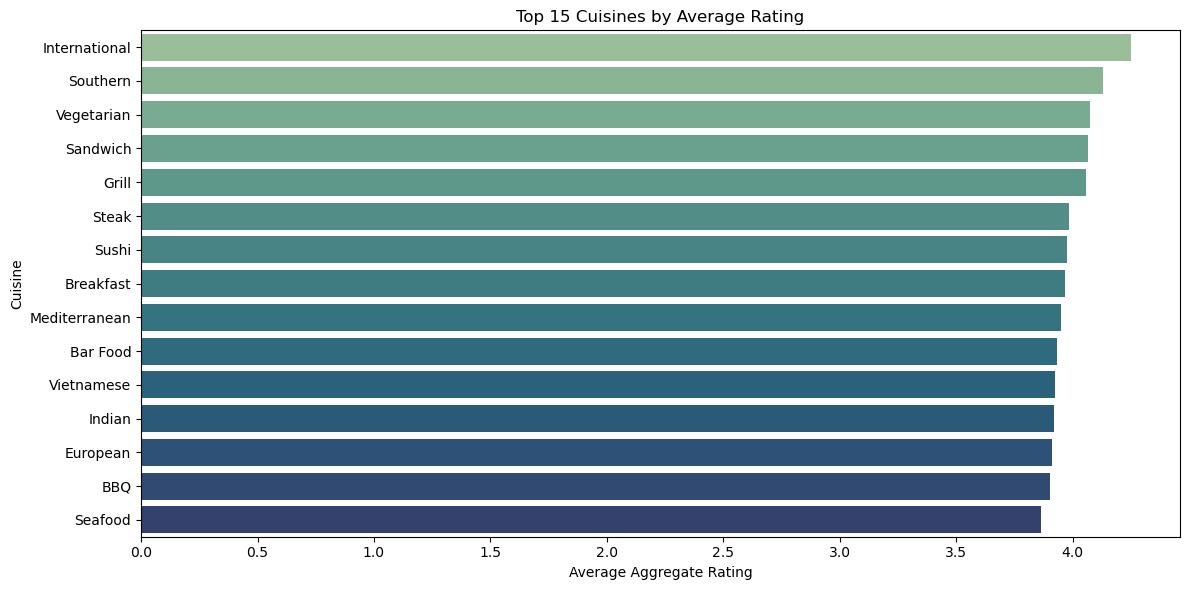

In [122]:

# Top 15 cuisines by average rating
top_rated_cuisines = cuisine_rating_filtered.sort_values('Average Rating', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_rated_cuisines, x='Average Rating', y='Cuisine', palette='crest')
plt.title('Top 15 Cuisines by Average Rating')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


### Task 3
- **Task: Data Visualization**

- **Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).**

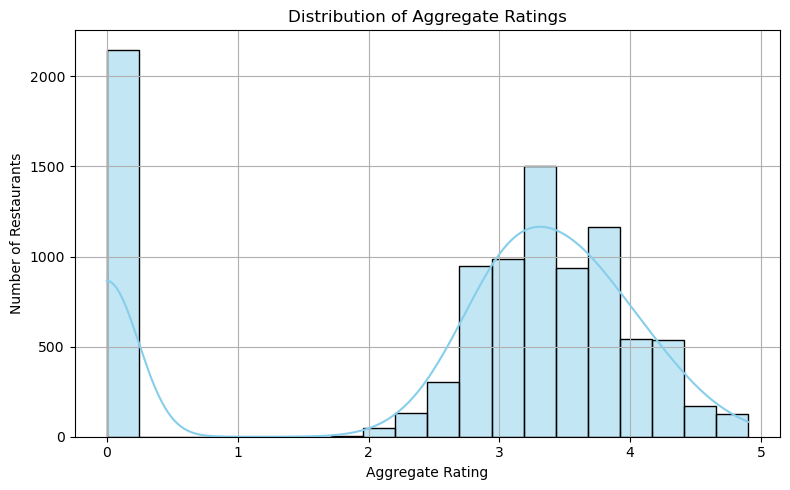

In [123]:

plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.tight_layout()
plt.show()


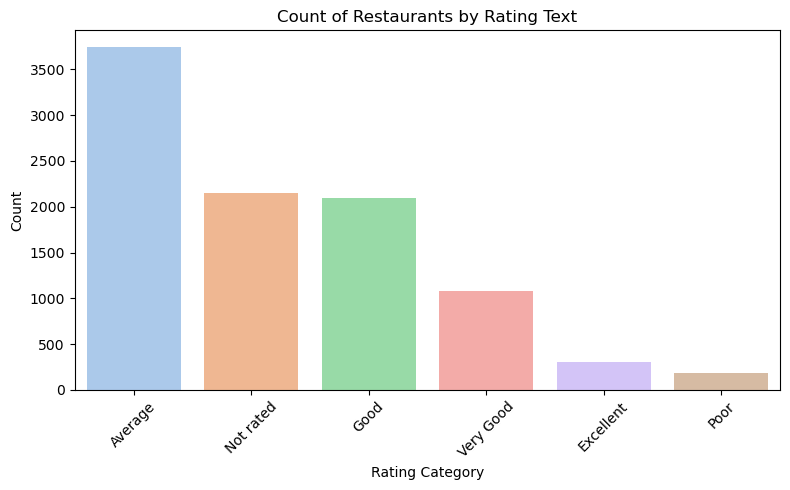

In [124]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Rating text', order=df['Rating text'].value_counts().index, palette='pastel')
plt.title('Count of Restaurants by Rating Text')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


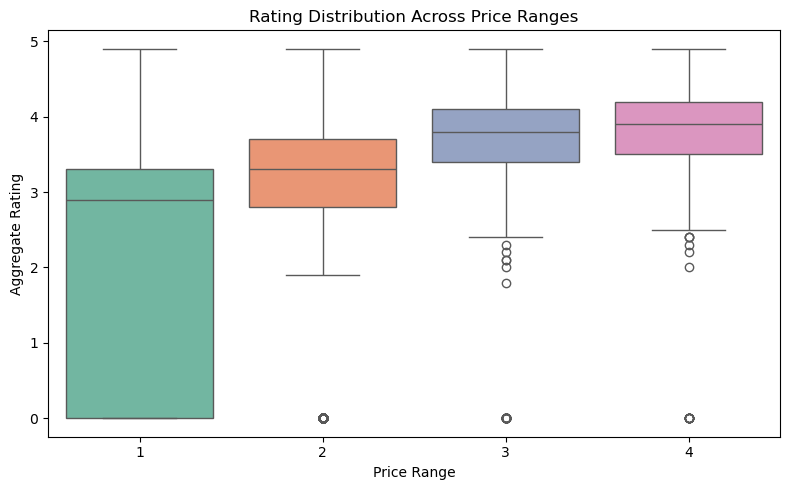

In [125]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Price range', y='Aggregate rating', palette='Set2')
plt.title('Rating Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()


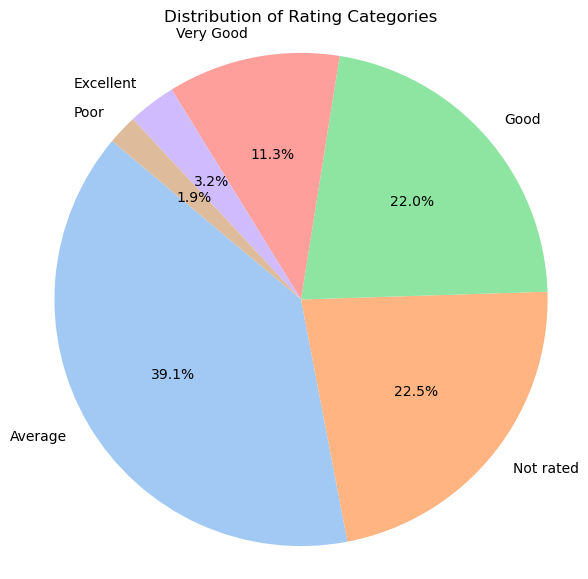

In [126]:
rating_counts = df['Rating text'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Rating Categories')
plt.axis('equal')
plt.show()


- **Compare the average ratings of different cuisines or cities using appropriate visualizations.**

## Compare Average Ratings by Cuisine

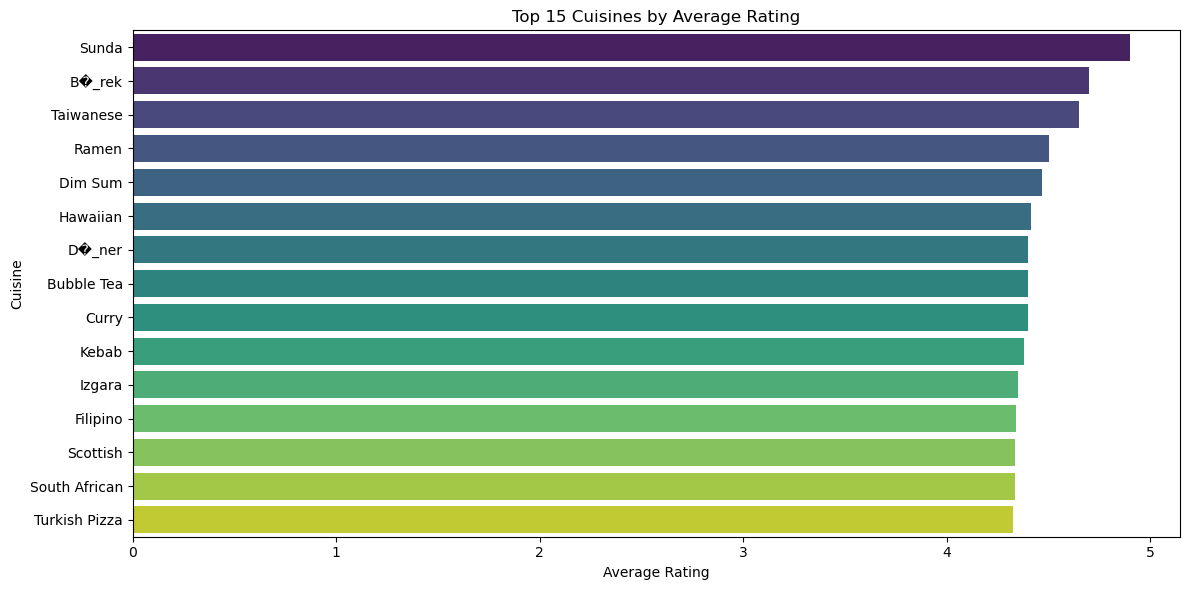

In [127]:
# Handle missing values
df_cuisine = df[['Cuisines', 'Aggregate rating']].dropna()

# Explode multiple cuisines per row
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.split(', ')
df_cuisine = df_cuisine.explode('Cuisines')

# Group and filter
cuisine_avg_rating = df_cuisine.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_avg_rating = cuisine_avg_rating.sort_values(by='Aggregate rating', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=cuisine_avg_rating.head(15), x='Aggregate rating', y='Cuisines', palette='viridis')
plt.title('Top 15 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()



##  Compare Average Ratings by City

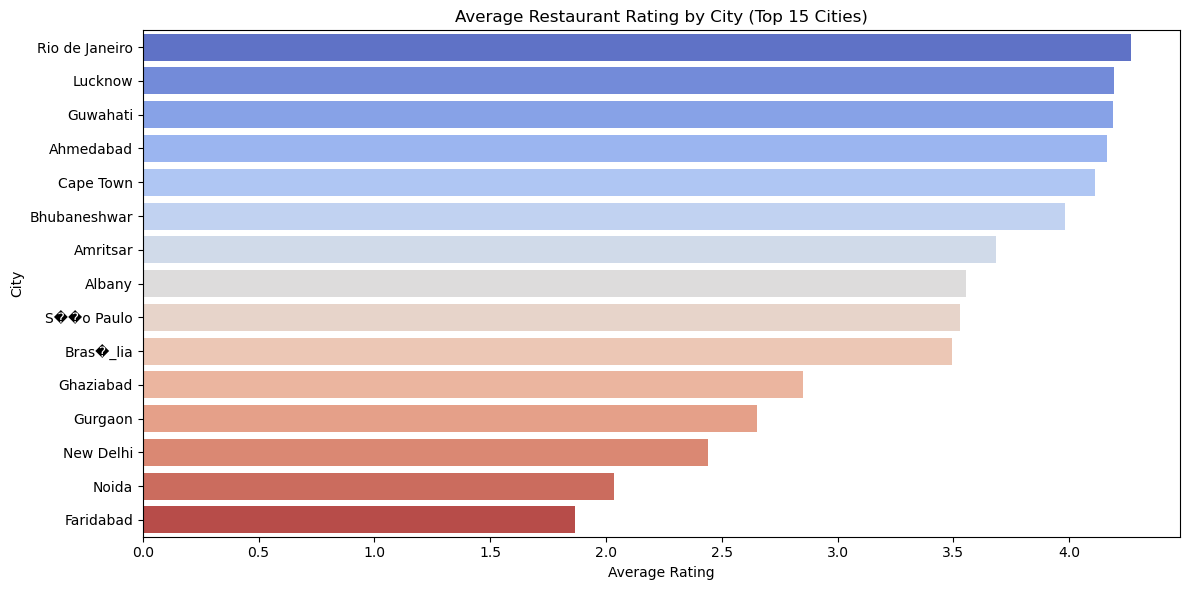

In [128]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().reset_index()
city_avg_rating = city_avg_rating.sort_values(by='Aggregate rating', ascending=False)

# Optional: Filter to top cities by restaurant count
top_cities = df['City'].value_counts().head(15).index
city_avg_rating = city_avg_rating[city_avg_rating['City'].isin(top_cities)]
plt.figure(figsize=(12, 6))
sns.barplot(data=city_avg_rating, x='Aggregate rating', y='City', palette='coolwarm')
plt.title('Average Restaurant Rating by City (Top 15 Cities)')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.tight_layout()
plt.show()


- **Visualize the relationship between various features and the target variable to gain insights.**

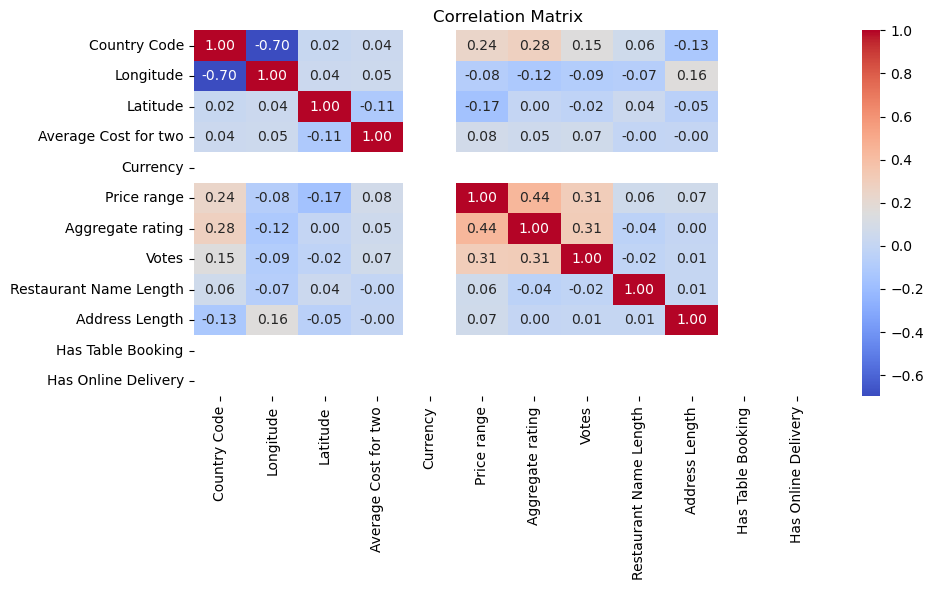

In [129]:

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


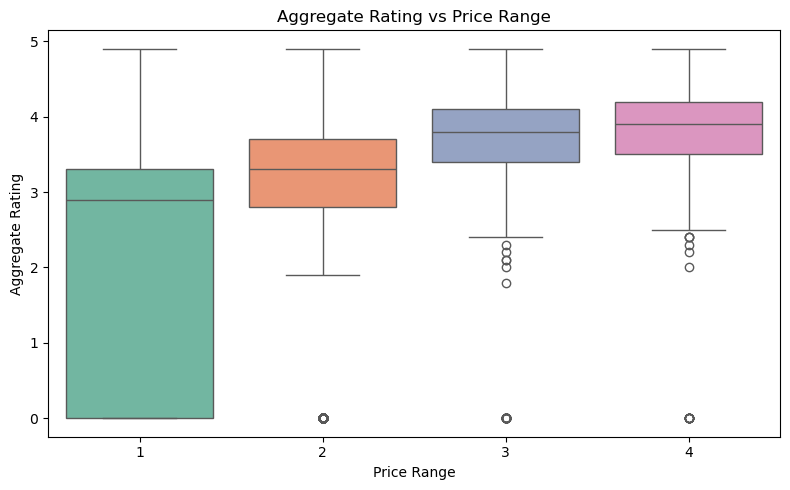

In [130]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Price range', y='Aggregate rating', palette='Set2')
plt.title('Aggregate Rating vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()


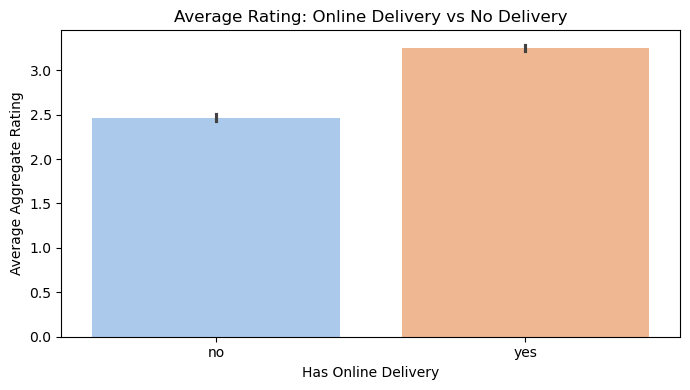

In [131]:
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='Has Online delivery', y='Aggregate rating', palette='pastel')
plt.title('Average Rating: Online Delivery vs No Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Average Aggregate Rating')
plt.tight_layout()
plt.show()


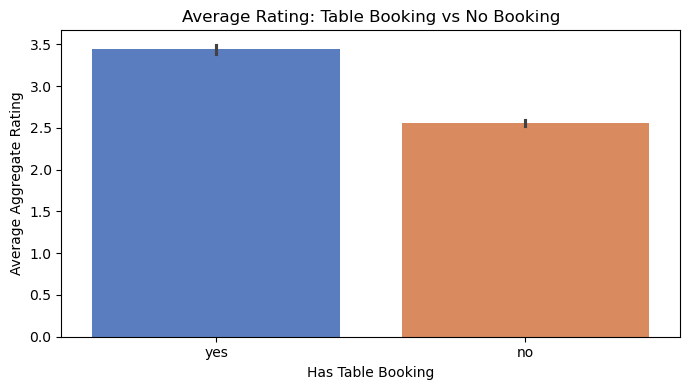

In [132]:
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='Has Table booking', y='Aggregate rating', palette='muted')
plt.title('Average Rating: Table Booking vs No Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Aggregate Rating')
plt.tight_layout()
plt.show()

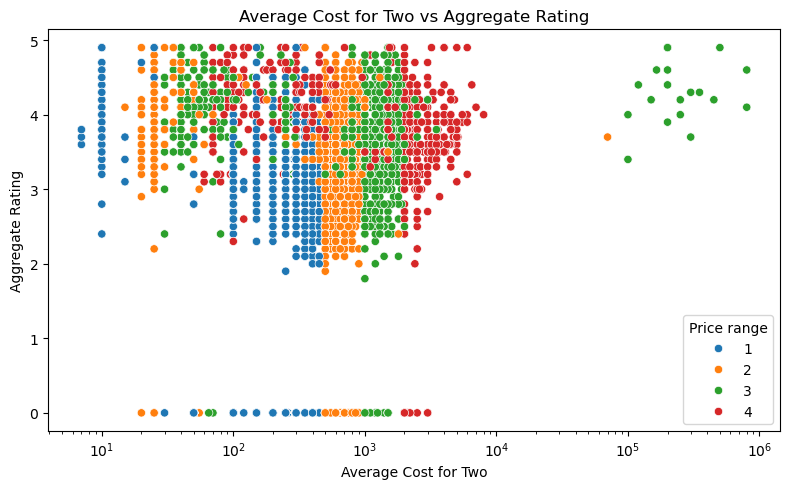

In [133]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Average Cost for two', y='Aggregate rating', hue='Price range', palette='tab10')
plt.title('Average Cost for Two vs Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.xscale('log')  # if values vary widely
plt.tight_layout()
plt.show()
